# How to explicitly execute another workflow before a SoS step

* **Difficulty level**: easy
* **Time need to lean**: 10 minutes or less
* **Key points**:
  * `sos_step` can trigger a workflow
  

## `sos_step()` of a workflow

This example is similar to the following workflow that uses subworkflow (`sos_run('work')`) but as you can see from the generated DAG, the execution logics of the two are quite different. More specifically, the `sos_step()` target adds a subworkflow to the master DAG, while `sos_run` triggers a separate DAG. 

INFO: work_1 (index=0) is ignored due to saved signature
INFO: work_2 (index=0) is ignored due to saved signature


> test.dot (500 B):

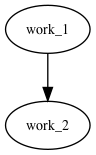

In [6]:
%preview -n test.dot
%run -d test.dot

[work_1]
# generate result
output: 'result.txt'
sh: expand=True
  echo some result > {_output}

[work_2]
# backup result
output: 'result.txt.bak'
sh: expand=True
  cp {_input} {_output}
  
[default]
sos_run("work")

## Further reading

* 